### Modelo básico. Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import SelectKBest, f_classif

In [10]:
df_original = pd.read_csv("../data/processed/processed_new_columns.csv", index_col=0)

In [11]:
df_original.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,explicit,artists_frequency,version_type,base_name,version_Live,version_Original,version_Remaster,version_Remix,version_type_encoded,decade
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,...,0,51,Original,!Que Vida! - Mono Version,0,1,0,0,1,1960
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,...,0,218,Original,"""40""",0,1,0,0,1,1980
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,...,0,218,Live,"""40"" -",1,0,0,0,0,1980
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,...,0,218,Remaster,"""40"" - 2008",0,0,1,0,2,1980
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,...,0,218,Remaster,"""40"" - 2008",0,0,1,0,2,1980


Comenzamos tomando la decisión de centrarnos en las décadas desde 1950 hasta la de 2010, ambas incluidas. Esta decisión se fundamenta en dos motivos principales:

- Motivo estadístico: El análisis descriptivo previo nos ha mostrado una descompensación de datos en función de las décadas. El periodo escogido sí tiene una representación equilibrada.
- Motivo de negocio: Si el objetivo es que personas de edad avanzada puedan escuchar canciones de ahora que suenan a décadas pasadas, esas en las que ellos eran más jóvenes y descubrían nueva música, contar con décadas anteriores a los 50 no tendría mucho sentido por el propio perfil (edad) de los usuarios.

In [12]:
#Incluimos solo canciones entre las décadas de 1950 y 2010
df_original = df[(df['decade'] >= 1950) & (df['decade'] <= 2010)]

In [13]:
df_original.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,explicit,artists_frequency,version_type,base_name,version_Live,version_Original,version_Remaster,version_Remix,version_type_encoded,decade
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,...,0,51,Original,!Que Vida! - Mono Version,0,1,0,0,1,1960
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,...,0,218,Original,"""40""",0,1,0,0,1,1980
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,...,0,218,Live,"""40"" -",1,0,0,0,0,1980
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,...,0,218,Remaster,"""40"" - 2008",0,0,1,0,2,1980
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,...,0,218,Remaster,"""40"" - 2008",0,0,1,0,2,1980


In [14]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139848 entries, 0 to 169906
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    139848 non-null  object 
 1   name                  139848 non-null  object 
 2   artists               139848 non-null  object 
 3   duration_ms           139848 non-null  int64  
 4   release_date          139848 non-null  object 
 5   year                  139848 non-null  int64  
 6   acousticness          139848 non-null  float64
 7   danceability          139848 non-null  float64
 8   energy                139848 non-null  float64
 9   instrumentalness      139848 non-null  float64
 10  liveness              139848 non-null  float64
 11  loudness              139848 non-null  float64
 12  speechiness           139848 non-null  float64
 13  tempo                 139848 non-null  float64
 14  valence               139848 non-null  float64
 15  mode 

In [15]:
df_original.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'artists_frequency', 'version_type',
       'base_name', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'version_type_encoded', 'decade'],
      dtype='object')

In [16]:
columnas_deseadas = [
    'id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
    'key', 'popularity', 'explicit', 'decade']

In [17]:
df = df_original[columnas_deseadas]

In [ ]:
df

In [21]:
#Agrupación
def asignar_rango_decada(decade):
    if 1950 <= decade <= 1969:
        return 'Era Dorada'
    elif 1970 <= decade <= 1989:
        return 'Explosión del Pop y Rock'
    elif 1990 <= decade <= 2009:
        return 'Modernización y Diversidad'
    else:
        return 'Era Contemporánea' 

In [22]:
df = df.copy()
df['decade_range'] = df['decade'].apply(asignar_rango_decada)

In [23]:
#Nueva variable target para poder utilizar en el modelo XGBoost
decade_mapping = {}
for idx, decade in enumerate(sorted(df['decade_range'].unique())):
    decade_mapping[decade] = idx
df['decade_label'] = df['decade_range'].map(decade_mapping)

ValueError: num must be an integer with 1 <= num <= 16, not 17

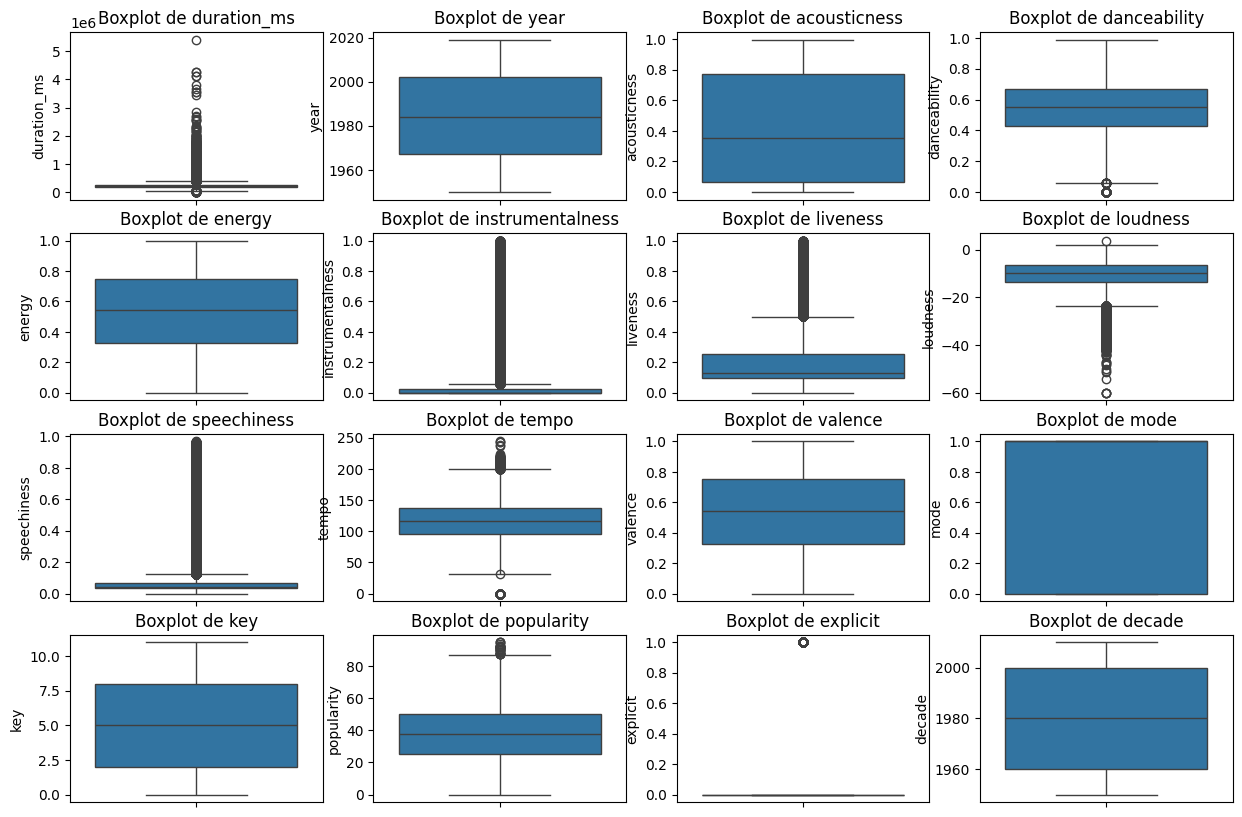

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las columnas numéricas
datos_numericos = df.select_dtypes(include=['float64', 'int64'])

# Crear un boxplot para cada variable numérica
plt.figure(figsize=(15, 10))
for i, columna in enumerate(datos_numericos.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=datos_numericos[columna])
    plt.title(f'Boxplot de {columna}')
plt.tight_layout()
plt.show()


In [25]:
# Calcular outliers usando el método IQR
outliers = {}
for columna in datos_numericos.columns:
    Q1 = datos_numericos[columna].quantile(0.25)
    Q3 = datos_numericos[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers[columna] = datos_numericos[(datos_numericos[columna] < limite_inferior) | (datos_numericos[columna] > limite_superior)]


In [27]:
features = df[['duration_ms', 'acousticness', 'danceability', 
               'energy', 'instrumentalness', 'liveness', 'loudness', 
               'speechiness', 'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit']]

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# Escalar los datos para el clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [30]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Calcular el coeficiente de silueta para diferentes números de clusters
silhouette_scores = []

for k in range(2, 11):  # La silueta no se define para k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Graficar el resultado
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para seleccionar el número de clusters')
plt.show()

KeyboardInterrupt: 

In [31]:
k_optimo = 4 
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [53]:
X= df[['duration_ms', 'acousticness', 'danceability', 
       'energy', 'instrumentalness', 'liveness', 'loudness', 
       'speechiness', 'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit', 'cluster']]
y = df['decade_range']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo Random Forest con KMeans: {accuracy:.2f}')

Accuracy del modelo Random Forest con KMeans: 0.72


In [39]:
# Importancia de características
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [40]:
importance_df

,Feature,Importance
12,popularity,0.277806
1,acousticness,0.095896
6,loudness,0.088677
0,duration_ms,0.077201
3,energy,0.067026
9,valence,0.061054
2,danceability,0.055658
7,speechiness,0.053878
8,tempo,0.052177
5,liveness,0.048310


In [41]:
selector = SelectKBest(score_func=f_classif, k=10)  # Selecciona las 10 mejores
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'loudness', 'valence', 'popularity', 'explicit',
       'cluster'],
      dtype='object')


In [42]:
X_train_k, X_test_k, y_train, y_test = train_test_split(X_new, y, train_size=0.2, random_state=42)

In [43]:
model_2_rf = RandomForestClassifier(random_state=42)

In [44]:
#Entrenamiento
model_2_rf.fit(X_train_k, y_train)

RandomForestClassifier(random_state=42)

In [45]:
#Evaluación
y_pred_rf = model_2_rf.predict(X_test_k)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

In [46]:
print("Accuracy del modelo RandomForestClassifier:", accuracy_rf)
print("Precisión (Precision):", precision_rf)
print("Sensibilidad (Recall):", recall_rf)
print("F1-Score:", f1_rf)

Accuracy del modelo RandomForestClassifier: 0.7006498091688342
Precisión (Precision): 0.7071534805173034
Sensibilidad (Recall): 0.693335113580387
F1-Score: 0.6990794772417027


In [64]:
param_grid = {'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']}

In [65]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rf_model,
    param_distributions=param_grid,
    n_iter=30, 
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1)

In [66]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (111878, 15)
Tamaño de y_train: (111878,)
Tamaño de X_test: (27970, 15)
Tamaño de y_test: (27970,)


In [67]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Propietario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
85 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Propietario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Propietario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Propietario\AppData\Local\Programs\Python\Python312\Lib\site

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [73]:
best_rf_model = RandomForestClassifier(
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42)

In [74]:
y_pred_proba_rf_best = best_rf_model.predict_proba(X_test)[:, 1]

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Modelado

In [8]:
X = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
      'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
      'key', 'popularity', 'explicit', 'version_type_encoded']]
y = df['decade']

In [9]:
#Dividimos en conjuntos para entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [10]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(139848, 15)
(27969, 15)
(111879, 15)
(27969,)
(111879,)


In [11]:
model_1 = RandomForestClassifier(random_state=42)

In [12]:
#Entrenamiento
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
#Evaluación
y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1, average='macro')
recall_1 = recall_score(y_test, y_pred_1, average='macro')
f1_1 = f1_score(y_test, y_pred_1, average='macro')

In [19]:
print("Accuracy del modelo RandomForestClassifier:", accuracy_1)
print("Precisión (Precision):", precision_1)
print("Sensibilidad (Recall):", recall_1)
print("F1-Score:", f1_1)

Accuracy del modelo RandomForestClassifier: 0.5387785017742382
Precisión (Precision): 0.5376827061842239
Sensibilidad (Recall): 0.538792482723168
F1-Score: 0.537014197311498


<mark>**Observación:**</mark> Mejora significativa: El modelo de Random Forest está funcionando mejor que el Decision Tree en todos los aspectos evaluados. Esto es consistente con la capacidad del Random Forest de capturar patrones complejos y reducir el sobreajuste en comparación con un solo árbol de decisión. No obstante, hay mucho margen de mejora.

In [15]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_1))

Reporte de clasificación:
              precision    recall  f1-score   support

        1950       0.81      0.77      0.79     16051
        1960       0.52      0.56      0.54     15958
        1970       0.43      0.43      0.43     15962
        1980       0.48      0.42      0.45     16011
        1990       0.40      0.36      0.38     15996
        2000       0.46      0.52      0.49     15989
        2010       0.66      0.72      0.69     15912

    accuracy                           0.54    111879
   macro avg       0.54      0.54      0.54    111879
weighted avg       0.54      0.54      0.54    111879



In [16]:
#Matriz de confusión
print("Matriz de confusión:")
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
print(conf_matrix_1)

Matriz de confusión:
[[12283  2941   398   109   167   106    47]
 [ 2565  8980  2495   664   605   450   199]
 [  124  2823  6808  3090  1642  1019   456]
 [   75  1386  3364  6766  2610  1361   449]
 [   32   803  1941  2781  5680  3449  1310]
 [    8   328   586   561  2700  8284  3522]
 [    1    80   138   114   641  3461 11477]]


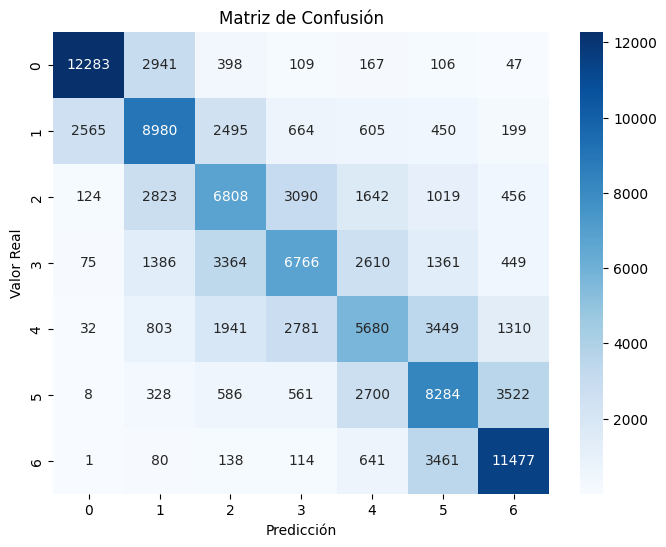

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

<mark>**Observaciones:**</mark>

- **Clase dominante (esquinas):** En las décadas más recientes y antiguas, como en las esquinas de la matriz (la primera y última filas y columnas), se puede ver que el modelo tiene un número notable de clasificaciones correctas, pero también muestra errores considerables.
- **Confusión entre décadas cercanas.** El modelo tiende a confundir décadas consecutivas. Por ejemplo, en las filas centrales (correspondientes a décadas como los 70s, 80s y 90s), hay un número significativo de errores entre décadas vecinas. Esto puede indicar que las características en el estilo y producción musical de las canciones de esas décadas son similares, haciendo difícil la distinción.
- **Desempeño general aceptable:** Aunque hay errores, el modelo básico está funcionando razonablemente bien, clasificando correctamente una gran cantidad de canciones en sus respectivas décadas.

In [18]:
#ROC-AUC multiclase (aunque es una métrica más favorable para modelos de clasificación binaria)
y_test_binarized_1 = label_binarize(y_test, classes=np.unique(y))
y_pred_proba_1 = model_1.predict_proba(X_test)
auc_score_1 = roc_auc_score(y_test_binarized_1, y_pred_proba_1, average='macro')
print("ROC-AUC Score (macro-average):", auc_score_1)

ROC-AUC Score (macro-average): 0.883774244626226


En un caso multiclase como este, se evalúa la capacidad del modelo para predecir correctamente cada clase en comparación con las demás.

### Optimización 1: Feature importance

In [20]:
feature_importances = model_1.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [21]:
importance_df

,Feature,Importance
12,popularity,0.212400
6,loudness,0.095443
1,acousticness,0.093043
0,duration_ms,0.079389
3,energy,0.075084
9,valence,0.068285
2,danceability,0.066546
7,speechiness,0.065886
8,tempo,0.061214
5,liveness,0.059900


In [22]:
X_reduc = df[['duration_ms', 'acousticness', 'danceability', 'energy', 
              'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
              'liveness', 'instrumentalness']]

In [23]:
#Dividimos en conjuntos para entrenamiento y pruebas
X_train_reduc, X_test_reduc, y_train, y_test = train_test_split(X_reduc, y, train_size=0.2, random_state=42)

In [24]:
print(X.shape)
print(X_train_reduc.shape)
print(X_test_reduc.shape)
print(y_train.shape)
print(y_test.shape)

(139848, 15)
(27969, 11)
(111879, 11)
(27969,)
(111879,)


In [25]:
model_2 = RandomForestClassifier(random_state=42)

In [26]:
#Entrenamiento
model_2.fit(X_train_reduc, y_train)

RandomForestClassifier(random_state=42)

In [27]:
#Evaluación
y_pred_2 = model_2.predict(X_test_reduc)
accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2, average='macro')
recall_2 = recall_score(y_test, y_pred_2, average='macro')
f1_2 = f1_score(y_test, y_pred_2, average='macro')

In [37]:
print("Accuracy del modelo RandomForest:", accuracy_2)
print("Precisión (Precision):", precision_2)
print("Sensibilidad (Recall):", recall_2)
print("F1-Score:", f1_2)

Accuracy del modelo RandomForest: 0.5341306232626319
Precisión (Precision): 0.5332950659307606
Sensibilidad (Recall): 0.5341456719014508
F1-Score: 0.5323381311296123


<mark>**Conclusiones:**</mark> 

- Haciendo una selección de variables (feature importance > 5) el modelo empeora mínimamente, lo que confirma que estas características tienen una importancia mínima en la predicción de la década.

- La ligera caída en las métricas sugiere que las características eliminadas (key, explicit, mode, version_type_encoded) eran redundantes o no contribuían significativamente a la predicción.

- La reducción en la complejidad del modelo puede ser beneficiosa en términos de eficiencia y generalización, aunque no se logró una mejora en el rendimiento.



### Optimización 2: SelectKBest

In [29]:
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [30]:
print(f"Características seleccionadas con SelectKBest (top {k}):")
print(selected_features)

Características seleccionadas con SelectKBest (top 10):
Index(['duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'loudness', 'speechiness', 'valence', 'popularity',
       'explicit'],
      dtype='object')


In [ ]:
X_train_k, X_test_k, y_train, y_test = train_test_split(X_new, y, train_size=0.2, random_state=42)

In [32]:
print(X.shape)
print(X_train_k.shape)
print(X_test_k.shape)
print(y_train.shape)
print(y_test.shape)

(139848, 15)
(27969, 10)
(111879, 10)
(27969,)
(111879,)


In [33]:
model_3 = RandomForestClassifier(random_state=42)

In [34]:
#Entrenamiento
model_3.fit(X_train_k, y_train)

RandomForestClassifier(random_state=42)

In [35]:
#Evaluación
y_pred_3 = model_3.predict(X_test_k)
accuracy_3 = accuracy_score(y_test, y_pred_3)
precision_3 = precision_score(y_test, y_pred_3, average='macro')
recall_3 = recall_score(y_test, y_pred_3, average='macro')
f1_3 = f1_score(y_test, y_pred_3, average='macro')

In [38]:
print("Accuracy del modelo RandomForestClassifier:", accuracy_3)
print("Precisión (Precision):", precision_3)
print("Sensibilidad (Recall):", recall_3)
print("F1-Score:", f1_3)

Accuracy del modelo RandomForestClassifier: 0.5321195219835715
Precisión (Precision): 0.5318931896638212
Sensibilidad (Recall): 0.5321316961973799
F1-Score: 0.5307430935109562


<mark>**Conclusión:**</mark> SelectKBest no mejoró significativamente el modelo. Esto sugiere que el modelo ya estaba utilizando las características más relevantes de manera efectiva.



### Optimización 3: Hiperparametrización

In [44]:
#Configuración de hiperparámetros para RandomForest
param_grid = {
    "n_estimators" : [20, 50, 100],
    "max_depth": np.arange(3,8),
    "max_features": np.arange(2,5),
    "max_leaf_nodes": [10,15,20]
}

In [52]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_k, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END max_depth=3, max_features=2, max_leaf_nodes=10, n_estimators=20; total time=   0.2s
[CV] END max_depth=3, max_features=2, max_leaf_nodes=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=3, max_features=2, max_leaf_nodes=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=3, max_features=2, max_leaf_nodes=10, n_estimators=20; total time=   0.2s
[CV] END max_depth=3, max_features=2, max_leaf_nodes=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=3, max_features=2, max_leaf_nodes=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=3, max_features=2, max_leaf_nodes=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=3, max_features=2, max_leaf_nodes=10, n_estimators=50; total time=   4.5s
[CV] END max_depth=3, max_features=2, max_leaf_nodes=10, n_estimators=50; total time=   5.3s
[CV] END max_depth=3, max_features=2, max_leaf_nodes=10, n_estimators=50; total time=   4.5s
[CV] EN

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': array([3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4]),
                         'max_leaf_nodes': [10, 15, 20],
                         'n_estimators': [20, 50, 100]},
             scoring='accuracy', verbose=2)

In [46]:
# Mostrar los mejores parámetros encontrados
grid_best_params = grid_search.best_params_
print("Mejores hiperparámetros:", grid_best_params)

Mejores hiperparámetros: {'max_depth': np.int64(7), 'max_features': np.int64(4), 'max_leaf_nodes': 20, 'n_estimators': 100}


In [47]:
#Evaluación del modelo
best_model = grid_search.best_estimator_
y_pred_4 = best_model.predict(X_test_k)
accuracy_4 = accuracy_score(y_test, y_pred_4)
precision_4 = precision_score(y_test, y_pred_4, average='macro')
recall_4 = recall_score(y_test, y_pred_4, average='macro')
f1_4 = f1_score(y_test, y_pred_4, average='macro')

In [48]:
print("Accuracy del modelo Decision Tree:", accuracy_4)
print("Precisión (Precision):", precision_4)
print("Sensibilidad (Recall):", recall_4)
print("F1-Score:", f1_4)

Accuracy del modelo Decision Tree: 0.48870654903958743
Precisión (Precision): 0.4863329269998541
Sensibilidad (Recall): 0.48876309901326404
F1-Score: 0.4799143588684679


In [51]:
#Incompleta la hiperparametrización por un error